In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['flower_name'] = df['target'].apply(lambda x : iris['target_names'][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[df['target']== 0]
df1 = df[df['target']== 1]
df2 = df[df['target']== 2]

Text(0, 0.5, 'sepal width (cm)')

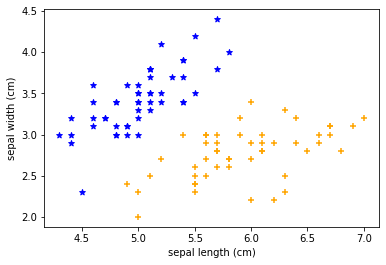

In [9]:
py.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], marker = '*', color = 'blue')
py.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker = '+', color = 'orange')
py.xlabel('sepal length (cm)')
py.ylabel('sepal width (cm)')

In [10]:
x = df.drop(['target', 'flower_name'], axis= 1)
y = df['target']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
x_scaled = scaler.fit_transform(x)

In [13]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

In [14]:
x_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state = 101)

In [16]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [17]:
sv_model  = SVC()

sv_model.fit(X_train, y_train)

SVC()

In [19]:
sv_model.score(X_test, y_test)

1.0

In [20]:
sv_model.score(X_train, y_train)

0.9833333333333333

<AxesSubplot:>

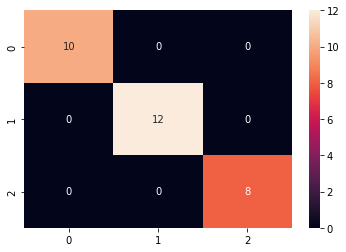

In [24]:
pred_res = sv_model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, pred_res), annot= True)

In [25]:
model_params = {
    'kernel':['linear','poly','rbf'],
    'C': [1, 10, 100, 1000],
    'gamma': [1e-3, 1e-4]
}

model = SVC()

gcv = GridSearchCV(estimator = model, param_grid = model_params, cv= 5, verbose =1)

In [26]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [28]:
gcv.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [30]:
svc_model = SVC(C= 1, gamma = 0.001, kernel = 'linear')

In [31]:
svc_model.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear')

In [32]:
svc_model.score(X_test, y_test)

1.0

<AxesSubplot:>

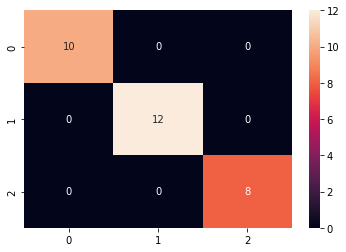

In [33]:
predicted_res = svc_model.predict(X_test)

sns.heatmap(confusion_matrix(y_test, predicted_res), annot= True)